# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## 4-AMALIYOT. Distribution


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ushbu amaliyotda uybor.uz saytidan yuklab olingan ma'lumotlar tahlili bilan shu'gullanamiz.

In [2]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/uybor_scrapping.csv?raw=true")
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


#### Yuqoridagi jadvalda Toshkent shahridagi sotildagian uylar haqida ma'lumotlar jamlangan.

## 1-VAZIFA. Jadvaldan xonalari 5 xonadan ko'p bo'lgan, narxi 200000 mingdan, maydoni 250kv.m dan ortiq bo'lgan uylarni tashlab yuboring

In [4]:
#JAVOBINGIZNI SHUYERGA YOZING
df = df[df['rooms']<=5]
df = df[df['price']<200000]
df = df[df['size']<250]
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


In [5]:
df.shape

(7216, 9)

## 2-VAZIFA. `subplot` yordamida uylarning narxi va xonalar soni taqsimoti grafiklarini yonma yon chizing

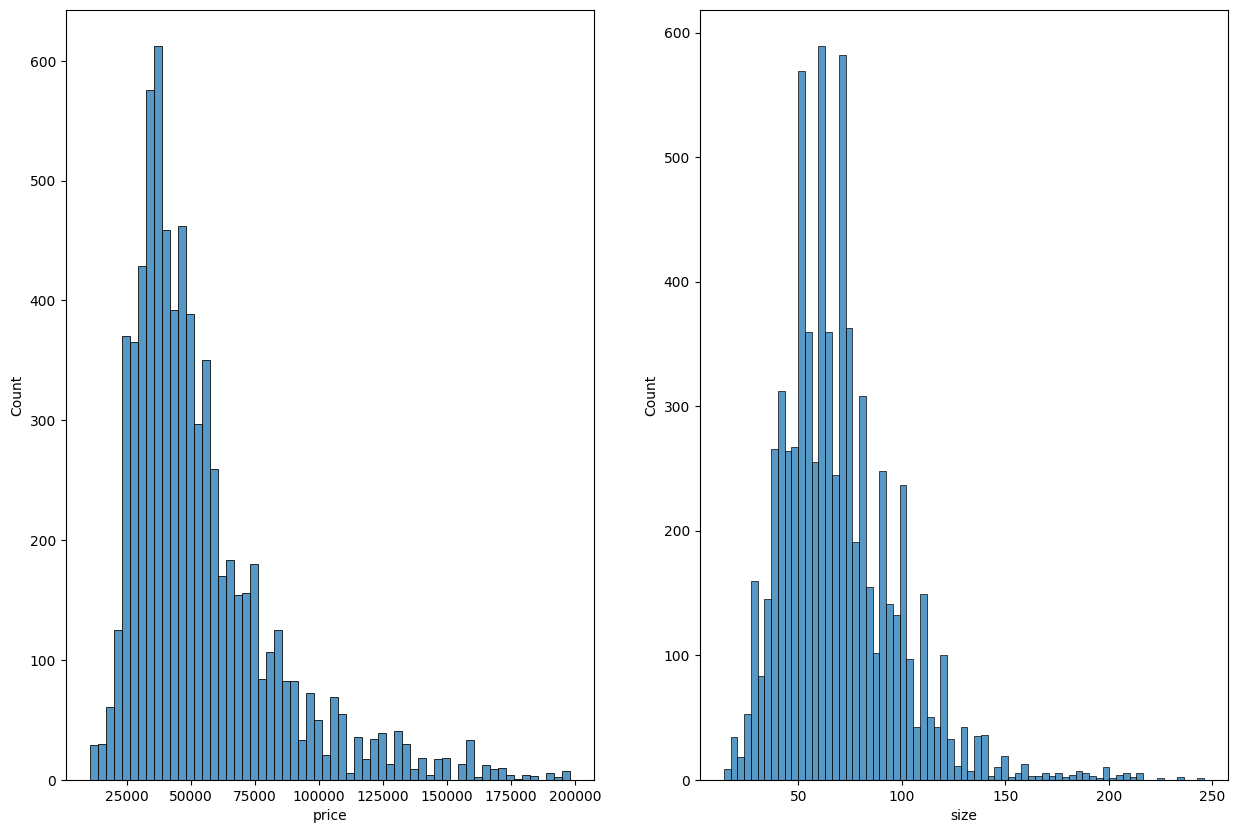

In [10]:
#JAVOBINGIZNI SHUYERGA YOZING
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.histplot(ax=ax[0], data=df, x='price')
sns.histplot(ax=ax[1], data=df, x='size')
plt.show()

### 3-VAZIFA. Uylarning narxi taqsimoti va narx va maydoni o'rtasidagi bog'liqlik grafiklarini bitta chizmada ustma ust chiqaring.

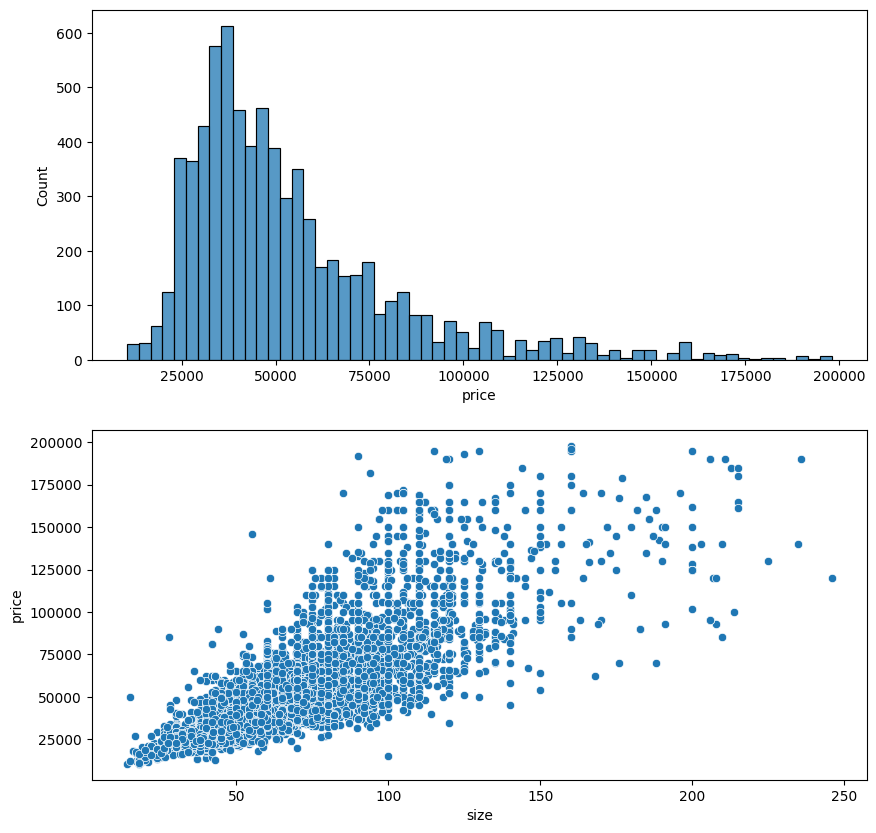

In [12]:
# JAVOB UCHUN JOY
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.histplot(ax=ax[0], data=df, x='price')
sns.scatterplot(ax=ax[1], data=df, x='size', y='price')
plt.show()

### 4-VAZIFA. Quyidagi grafikni chizing. Ahamiyat bering, oxirgi grafikda tumanlar bo'yicha uylarning o'rtacha narxi tasvirlangan.

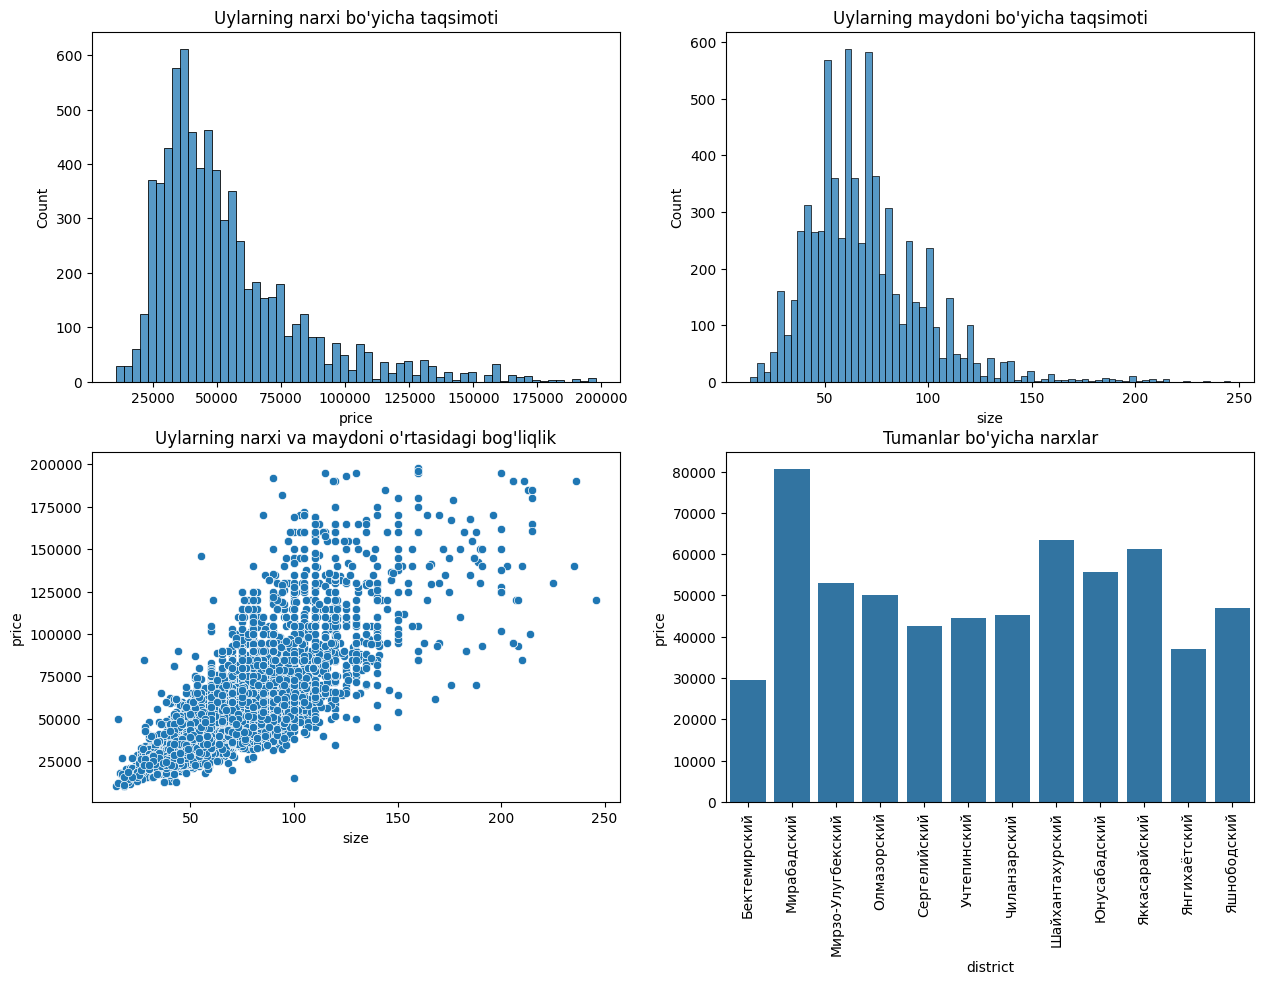

In [18]:
# JAVOB UCHUN JOY
meandf = df.groupby('district').mean(numeric_only=True)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
sns.histplot(ax=ax[0, 0], data=df, x='price')
sns.histplot(ax=ax[0, 1], data=df, x='size')
sns.scatterplot(ax=ax[1, 0], data=df, x='size', y='price')
sns.barplot(ax=ax[1, 1], x=meandf.index, y=meandf['price'])

ax[0,0].set_title("Uylarning narxi bo'yicha taqsimoti")
ax[0,1].set_title("Uylarning maydoni bo'yicha taqsimoti")
ax[1,0].set_title("Uylarning narxi va maydoni o'rtasidagi bog'liqlik")
ax[1,1].set_title("Tumanlar bo'yicha narxlar")
plt.xticks(rotation=90)
plt.show()